<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform standard imports and load datasets

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dane.csv to dane.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dane.csv']),sep=';', decimal=',')

In [5]:
df.head()

,nr faktury,data sprzedaży,kontrahent,produkt,wolumen sprzedaży [kg],wartość sprzedaży [PLN],Cena
0,FV2018/989012513,03.10.2018,Stonka,parówka warszawska,"90,74","1 051,12",11.583870
1,FV2019/997755115,28.12.2019,Stonka,parówka warszawska,"398,29","4 600,00",11.549370
2,FV2020/538048561,13.02.2020,Ropucha,parówka warszawska,"241,60","2 833,32",11.727320
3,FV2018/737760288,20.12.2018,Fresco,parówka warszawska,"471,70","5 558,33",11.783610
4,FV2018/546551902,25.05.2018,Fresco,parówka warszawska,"953,60","9 194,21",9.641579


In [0]:
df = df[df['produkt'] == 'parówka warszawska']

In [6]:
df.shape

(38671, 7)

In [0]:
#date as index
df.set_index('data sprzedaży', inplace=True)

In [0]:
#Sorting values by date
df = df.sort_values(by='data sprzedaży')

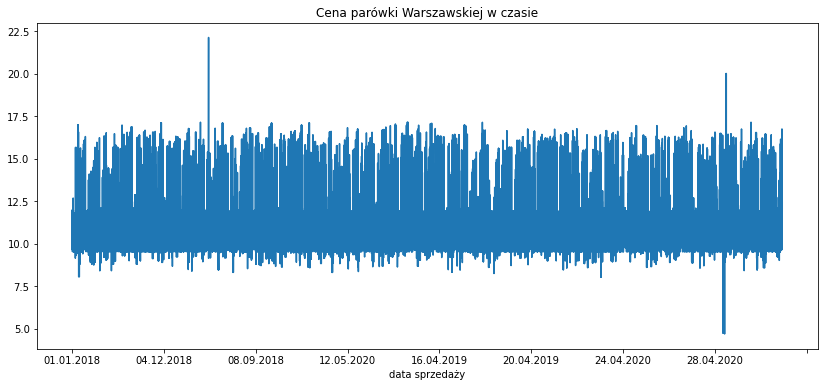

In [9]:
# On the below plot We can see there is a seasonality
plt.figure(figsize = (14,6))
plt.title(label = 'Cena parówki Warszawskiej w czasie')
df['Cena'].plot();

### Split the data into train/test sets
As a general rule you should set the length of your test set equal to your intended forecast size. For this dataset we'll attempt a 1-month forecast.

In [14]:
df.head()

,nr faktury,kontrahent,produkt,wolumen sprzedaży [kg],wartość sprzedaży [PLN],Cena
data sprzedaży,,,,,,
01.01.2018,FV2018/167772378,Fresco,parówka warszawska,"948,80","9 372,81",9.878594
01.01.2018,FV2018/167772378,Fresco,parówka warszawska,"982,40","11 108,37",11.307380
01.01.2018,FV2018/167772378,Fresco,parówka warszawska,"256,00","2 772,81",10.831289
01.01.2018,FV2018/684577289,Stonka,parówka warszawska,"536,00","5 357,70",9.995709
01.01.2018,FV2018/167772378,Fresco,parówka warszawska,"298,10","3 300,21",11.070820


In [20]:
df.shape

(38671, 6)

In [15]:
df1 = df['Cena']
df1.head()

data sprzedaży
01.01.2018     9.878594
01.01.2018    11.307380
01.01.2018    10.831289
01.01.2018     9.995709
01.01.2018    11.070820
Name: Cena, dtype: float64

In [0]:
stepwise_fit = auto_arima(train, start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

This suggests that we should fit SARIMA(5,1,0)(0,1,1,12) model to best forecast based on AIC criteria




In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
model = SARIMAX(df['Cena'],order=(5,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Cena   No. Observations:                38671
Model:             SARIMAX(5, 1, 0)x(0, 1, 1, 12)   Log Likelihood              -67007.703
Date:                            Sun, 17 May 2020   AIC                         134029.407
Time:                                    19:21:31   BIC                         134089.344
Sample:                                         0   HQIC                        134048.409
                                          - 38671                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8266      0.004   -194.031      0.000      -0.835      -0.818
ar.L2         -0.6546      0.005   -122.826      0.000      -0.665      -0.644
ar.L3         -0.4863      0.006    -86.208      0.000      -0.497      -0.475
ar.L4         -0.3341      0.005    -62.341      0.000      -0.345      -0.324
ar.L5         -0.1665      0.004    -38.897      0.000      -0.175      -0.158
ma.S.L12      -1.0000      0.022    -45.217      0.000      -1.043      -0.957
sigma2         1.8706      0.042     44.777      0.000       1.789       1.952
===================================================================================
Ljung-Box (Q):                     1948.53   Jarque-Bera (JB):             33058.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.35
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
fcast = results.predict(len(df),len(df)+200,typ='levels').rename('SARIMA(5,1,0)(0,1,1,12) Forecast')

In [34]:
#Predicted values for next 200 days
# Nevertheless it's reccomended to run ARIMA every day to have a better prediction for everyday
# Instead of running predictions for many days at once
fcast

38671    10.544833
38672    10.664604
38673    10.760594
38674    10.917939
38675    10.893631
           ...    
38867    10.889245
38868    10.908988
38869    10.900558
38870    10.897929
38871    10.911509
Name: SARIMA(5,1,0)(0,1,1,12) Forecast, Length: 201, dtype: float64